# COMP20230 - Assignment 2

In [1]:
# from scipy.optimize import curve_fit
import timeit
import matplotlib.pyplot as plt
import numpy as np
# import random
# import math

## Section 1 - Sorting Algorithms

### Section 1.x - Implement Sorting Algorithms

#### Bubble Sort

In [2]:
def bubble_sort(*args):
    """Implementation of the Bubble Sort Algorithm
    
    For each index in the array, comparison operations are performed to push the largest element to the top of the array
    Once the element is at the top of the array, we forget about it, and move onto the previous position in the array
    We do this until no more comparison operations have been performed - indicating that the array has been sorted
    Runtime Complexity = O(N^2)
    Reference: https://stackabuse.com/bubble-sort-in-python/
    """
    our_list = args[0]

    has_swapped = True

    num_of_iterations = 0

    while(has_swapped):
        has_swapped = False
        for i in range(len(our_list) - num_of_iterations - 1):
            if our_list[i] > our_list[i+1]:
                # Swap
                our_list[i], our_list[i+1] = our_list[i+1], our_list[i]
                has_swapped = True
        num_of_iterations += 1

    return our_list

#### Quick Sort

In [3]:
def quick_sort(*args):
    """Implementation of the Quick Sort Algorithm
    
    Revolves around the idea of partitioning an array using a pivot
    Run algorithm recursively on each of the partitions until you reach the base case
    The base case is where the length of the array == 1, at which point you start joining the fragmented arrays back together
    The choice of which pivot point to use impacts the algorithm's performance. 
    We have chosen a pivot in the middle of the array (should result in the best performance, given that we know the input arrays are in reverse order)
    Runtime complexity (when optimal pivot is used): O(N * Log(N))
    Runtime complexity (when worst pivot is used): O(N^2)
    Reference: COMP20230 lab material
    """
    data = args[0]

    if len(data) > 1:
        less = []
        equal = []
        greater = []
        pivot = data[len(data) // 2]

        for x in data:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            else:
                greater.append(x)

        return quick_sort(less) + equal + quick_sort(greater)

    else:
        return data

#### Merge Sort

In [4]:
def merge(left, right):
    """Function for merging two arrays in such a way that the newly produced array is sorted
    
    The two arrays will be the fragmented arrays produced by the merge_sort function
    At first, there will be a comparison performed between the elements at index 0 in both arrays
    The smallest element will be put into the new sorted array
    Another comparison will be done, this time between the larger of the two elements from the last comparison, and the next element in the other array
    This process is repeated until one of the two arrays is empty, at which point the rest of the other array can be entered into the sorted array as is.
    Runtime complexity: O(N)
    """
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result


def merge_sort(*args):
    """Implementation of the Merge Sort Algorithm
    
    This algorithm begins by partitioning the input array in half until the base case is reached
    The base case is reached with the length of the array <= 1
    Once we've reached the base case, we start comparing the fragmented arrays.
    We create a new array to store the arrays during the comparison process.
    The partitioning process is logarithmic in terms of complexity
    The comparison process is linear in terms of complexity.
    Runtime complexity: O(N * Log(N))
    Reference: COMP20230 lab material
    """
    arr = args[0]

    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = merge_sort(left)
    right = merge_sort(right)
    return list(merge(left, right))

### Section 1.x: Create the input lists

In [5]:
def input_list_generator(n):
    """Function for generating input lists for the sorting algorithm runtime analysis
    
    Input = the number of lists you wish to generate
    Output = a list of len = input containing lists of len in the range 0 to input - 1
    """

    inputs = []

    for i in range(1, n+1):
        inputs.append([x for x in range(i-1, -1, -1)])

    return inputs

In [6]:
inputs = input_list_generator(1000)

### Section 1.x: Create helper functions

#### Create function to calculate runtimes

In [7]:
def get_runtimes(*args, funct=bubble_sort):
    """Function that takes in a series of positional arguments and a function and returns the runtime of function(arguments)"""
        
    # Compute the runtime of the algorithm using the timeit module
    start = timeit.default_timer()
    funct(*args)
    stop = timeit.default_timer()
    runtime = stop - start

    return runtime

### Section 1.x: Calculate the sorting algorithm runtimes

In [8]:
def sorting_runtime_calculator(inputs, funct=bubble_sort):
    """Function to calculate the runtimes of sorting algorithms
    
    Input = Input list and the sorting algorithm
    Output = A list of runtimes
    """

    average_runtimes = []
    number_of_runs = 5

    for input in inputs:
        # if len(input) % 100 == 0:
        #     print(len(input))

        all_runtimes = np.zeros(shape=(number_of_runs, 1))

        for i in range(number_of_runs):
            all_runtimes[i] = get_runtimes(input, funct=funct)

        average_runtimes.append(np.mean(all_runtimes))

    return average_runtimes

In [9]:
bubble_runtimes = sorting_runtime_calculator(inputs, bubble_sort)
quick_sort_runtimes = sorting_runtime_calculator(inputs, quick_sort)
merge_sort_runtimes = sorting_runtime_calculator(inputs, merge_sort)

### Section 1.x: Plot Results

Text(0.5, 1.0, 'Sorting Algorithm Runtime Analysis')

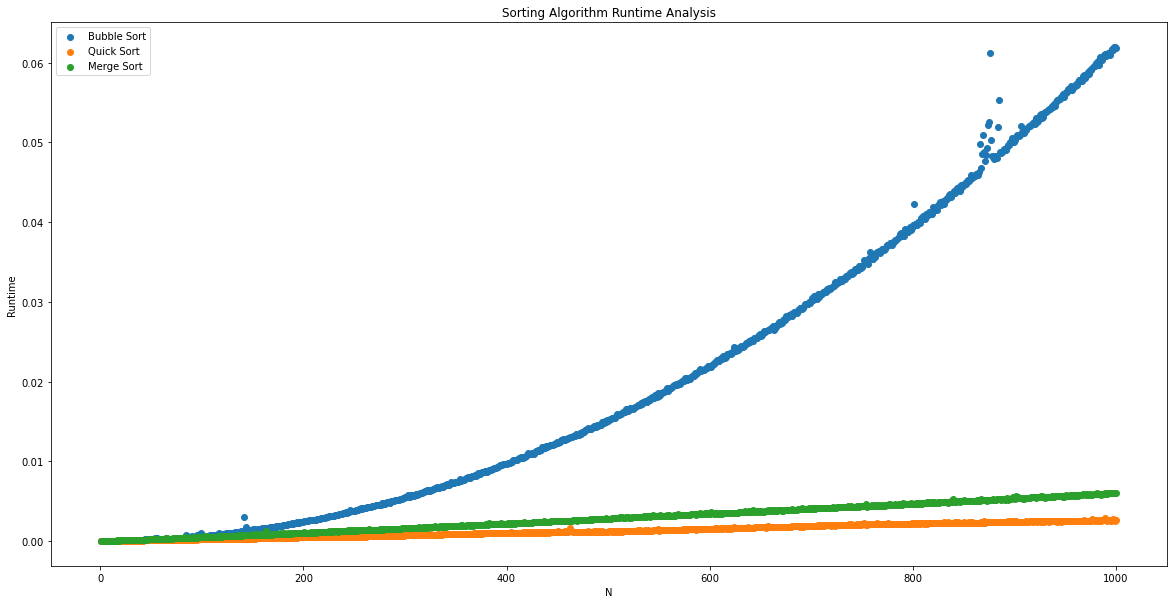

In [10]:
n_list = [x for x in range(1, 1001)]

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(n_list, bubble_runtimes, label="Bubble Sort")
ax.scatter(n_list, quick_sort_runtimes, label="Quick Sort")
ax.scatter(n_list, merge_sort_runtimes, label="Merge Sort")
plt.legend()
plt.xlabel("N")
plt.ylabel("Runtime")
plt.title("Sorting Algorithm Runtime Analysis")

#### Zoom in on Merge Sort

(0.0, 0.008)

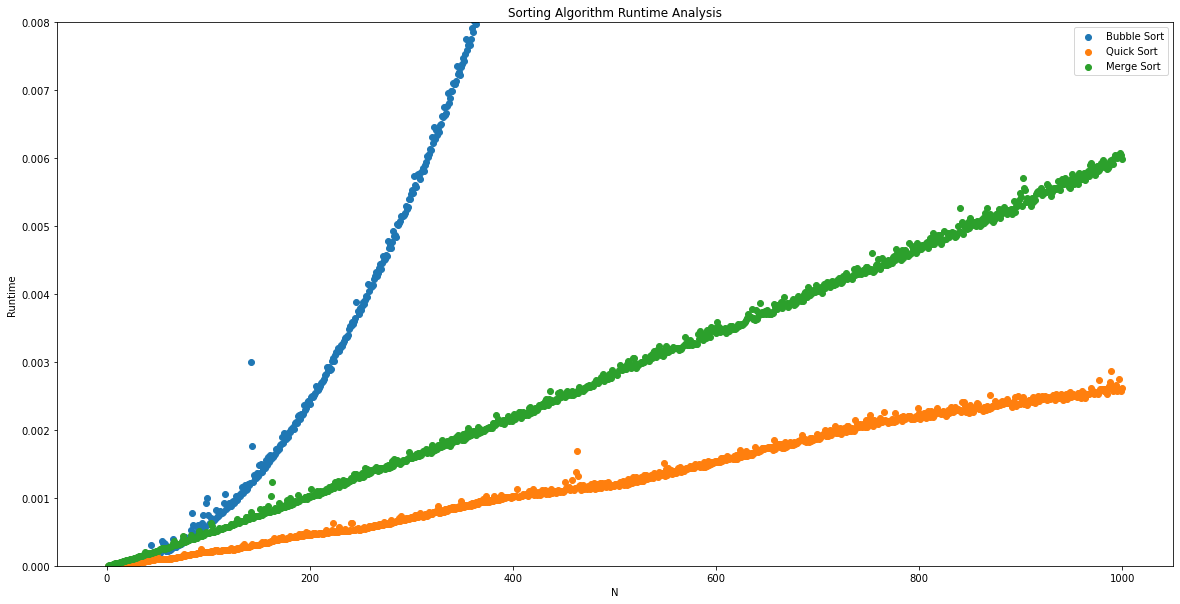

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(n_list, bubble_runtimes, label="Bubble Sort")
ax.scatter(n_list, quick_sort_runtimes, label="Quick Sort")
ax.scatter(n_list, merge_sort_runtimes, label="Merge Sort")
plt.legend()
plt.xlabel("N")
plt.ylabel("Runtime")
plt.title("Sorting Algorithm Runtime Analysis")
plt.ylim(0, 0.008)

### Section 1.x: Discussion of results

As we expected, bubble sort was the worst performing out of all of the algorithms. Bubble sort has an O(N^2) time complexity, as you not only have to go through each element in the input array and continuously do comparison operations to push the largest element to the highest index, but you have to do this for each position in the array (find the largest element to put at index len(arr) -1, then find the next largest element to put at index len(arr) - 2 etc.). We made some optimisations to the bubble sort algorithm (we performed checks to see if the array was already sorted before continuing, and decremented the inner for loop each time so that the elements that were in order were left alone for the rest of the algorithm's runtime duration), however, the optimisations were not enough to be competitive against merge sort and quick sort.

Merge sort and quick sort both have a best and average case time complexity of N * Log(N). Since we knew the structure of our input data (reverse order list), we were able to anticipate the optimal pivot point for quick sort. In practice, this is not always possible, and if we had picked either the first or the last element each time as our pivot, we would have obtained O(N^2) performance. We note that quick sort performed worse than merge sort. This was down to the additional storage complexity associated with merge sort. Merge sort requires the creation of a new data structure to store the sorted array elements. As our input array gets larger, this puts additional pressure on Python to find enough space in memory to store this new data structure, giving rise to a longer runtime

## Section 2: Graphs/Dijkstra's Algorithm

http://graphonline.ru/en/?graph=fOSIhpMeHFMyORBb

### Visit A

![](Graph_Screenshots/A_Visit.png)

### Update neighbour distances for A

![](Graph_Screenshots/A_Updated.png)

### Visit B

### Update neighbour distances for B